# Importar librerías

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample

# Recolectar datos

In [16]:
df = pd.read_csv("pokemon.csv")

In [17]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [18]:
df["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

# Preprocesar datos

##Limpieza de los datos

In [19]:
df["Type 2"] = df["Type 2"].fillna("None")

## Ingeniería de características

In [20]:
df["Generation"].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

In [21]:
sections = []
for category in df["Generation"].unique():
  sections.append(resample(df[df['Generation'] == category], replace=False, random_state=2, n_samples=82))

df = pd.concat(sections)

In [22]:
df = df[['Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Generation']]

In [23]:
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation
42,Fire,None,38,41,40,50,65,65,False,1
23,Normal,Flying,83,80,80,135,80,121,False,1
44,Normal,Fairy,115,45,20,45,25,20,False,1
156,Ice,Flying,90,85,100,95,125,85,True,1
13,Bug,None,45,30,35,20,20,45,False,1
...,...,...,...,...,...,...,...,...,...,...
761,Poison,Dragon,65,75,90,97,123,44,False,6
740,Grass,None,66,65,48,62,57,52,False,6
790,Flying,Dragon,40,30,35,45,40,55,False,6
733,Bug,None,45,22,60,27,30,29,False,6


## Codificación

In [24]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
numerical_columns = list(x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")])
categorical_columns = list(x.columns[(x.dtypes == "object") | (x.dtypes == "bool")])
all_columns = x.columns

In [26]:
# Codificación cruda

#raw_encodings = {}

#for col in categorical_columns:
  #dict_ = {val: i for i, val in enumerate(list(x[col].unique()))}
  #raw_encodings[col] = dict_
  #x[col] = x[col].map(dict_)


In [27]:
# Codificación con scikit-learn

encodings = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
  x[col] = encodings[col].fit_transform(x[col])


<Axes: xlabel='Type 1', ylabel='Speed'>

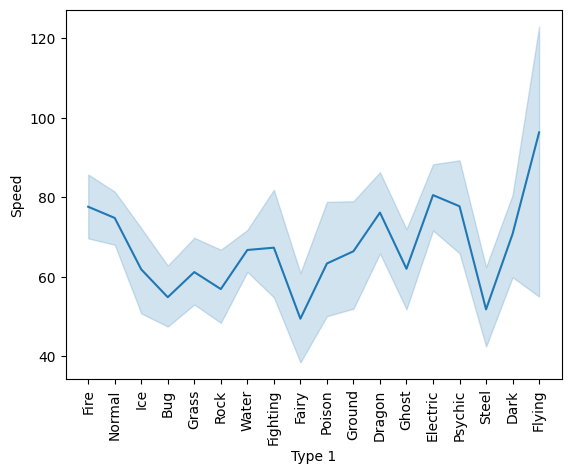

In [28]:
plt.xticks(rotation=90)
sns.lineplot(data=df, x="Type 1", y="Speed")

In [29]:
minmaxsc = MinMaxScaler()
x = minmaxsc.fit_transform(x)

#Entrenamiento + Evaluación

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.10      0.18      0.13        17
           2       0.06      0.08      0.07        13
           3       0.38      0.29      0.32        21
           4       0.00      0.00      0.00        17
           5       0.33      0.31      0.32        13
           6       0.44      0.39      0.41        18

    accuracy                           0.21        99
   macro avg       0.22      0.21      0.21        99
weighted avg       0.23      0.21      0.22        99

[[3 5 2 3 2 2]
 [5 1 3 1 1 2]
 [6 3 6 3 2 1]
 [7 3 2 0 2 3]
 [4 2 2 0 4 1]
 [4 3 1 2 1 7]]
0.21212121212121213


In [32]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)

y_pred = rfc_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.24      0.28        17
           2       0.26      0.38      0.31        13
           3       0.20      0.14      0.17        21
           4       0.19      0.18      0.18        17
           5       0.37      0.54      0.44        13
           6       0.39      0.39      0.39        18

    accuracy                           0.29        99
   macro avg       0.29      0.31      0.29        99
weighted avg       0.29      0.29      0.28        99

[[4 2 4 2 3 2]
 [1 5 1 1 1 4]
 [2 5 3 3 6 2]
 [2 4 4 3 1 3]
 [1 1 1 3 7 0]
 [2 2 2 4 1 7]]
0.29292929292929293


In [33]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred = gnb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      0.65      0.39        17
           2       0.25      0.23      0.24        13
           3       0.09      0.05      0.06        21
           4       0.00      0.00      0.00        17
           5       0.19      0.23      0.21        13
           6       0.13      0.11      0.12        18

    accuracy                           0.20        99
   macro avg       0.16      0.21      0.17        99
weighted avg       0.15      0.20      0.16        99

[[11  2  1  0  3  0]
 [ 3  3  1  0  3  3]
 [ 8  2  1  2  4  4]
 [ 7  1  3  0  2  4]
 [ 5  2  1  0  3  2]
 [ 5  2  4  4  1  2]]
0.20202020202020202


#Predicciones

In [34]:
new_pokemons = pd.DataFrame([
                             [
                              "Rock",	"Fairy",	60,	110,	140,	90,	120,	50,	True
                             ],
                             [
                              "Water", "None",	45,	45,	45,	50,	60,	55,	False
                             ],
                             [
                              "Dragon",	"Flying",	105,	140,	80,	160,	100,	95,	True
                             ],
                             [
                              "Dragon",	"Psychic",	80,	90,	80,	130,	110,	110,	False
                             ]
], columns=all_columns)

In [35]:
new_pokemons

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Rock,Fairy,60,110,140,90,120,50,True
1,Water,None,45,45,45,50,60,55,False
2,Dragon,Flying,105,140,80,160,100,95,True
3,Dragon,Psychic,80,90,80,130,110,110,False


In [36]:
for feature, encoding in encodings.items():
  dict_ = {val: idx for idx, val in enumerate(encoding.classes_)}
  new_pokemons[feature] = new_pokemons[feature].apply(lambda x: dict_.get(x))

In [37]:
new_pokemons = minmaxsc.fit_transform(new_pokemons)

In [38]:
print(knn_clf.predict(new_pokemons))

[3 3 5 1]
